# Wine on Whiskey (mixed analysis)

In [1]:
import pandas as pd
import numpy as np
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
font = {'size'   : 18}
mpl.rc('font', **font) 

## Wine

In [3]:
# Read
wine1 = pd.read_csv("Data/Wine/winemag-data-130k-v2.csv", index_col=0)
wine2 = pd.read_csv("Data/Wine/winemag-data_first150k.csv", index_col=0)
wineRevs = pd.concat([wine1, wine2])
print(wineRevs.columns)

# Rename
wineRevs = wineRevs[['description', 'points']]

# Remove duplicates 
print(wineRevs.shape)
wineRevs = wineRevs.drop_duplicates(subset=['description']).reset_index(drop=True)
print('-----')
print(wineRevs.shape)
wineRevs[1:5]

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')
(280901, 2)
-----
(169430, 2)


,description,points
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


In [4]:
nlp = spacy.load("en_core_web_lg")
description = []
for desc in wineRevs['description']:
    doc = nlp(desc) 
    description.append(' '.join([token.lemma_ for token in doc if (not token.is_stop and token.is_alpha)]))
wineRevs['description'] = description

In [5]:
df_wine = wineRevs.copy()
points = []
for row in df_wine.points:
    if row < 90:
        points.append(0)
    else:
        points.append(1)

df_wine['points'] = points

In [6]:
train_x, test_x, train_y, test_y = train_test_split(df_wine.description, df_wine.points, train_size=0.8, random_state=50)

In [ ]:
cv = CountVectorizer()
X_train = cv.fit_transform(train_x)
X_test = cv.transform(test_x)

In [8]:
classifier_naive = MultinomialNB()
classifier_naive.fit(X_train, train_y)
prediction_naive = classifier_naive.predict(X_test)
print(classification_report(test_y, prediction_naive))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     21667
           1       0.70      0.77      0.74     12219

    accuracy                           0.80     33886
   macro avg       0.78      0.79      0.79     33886
weighted avg       0.81      0.80      0.80     33886



In [10]:
svm = LinearSVC(dual=False)
svm.fit(X_train, train_y)
prediction_svm = svm.predict(X_test)
print(classification_report(test_y, prediction_svm))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     21667
           1       0.78      0.73      0.76     12219

    accuracy                           0.83     33886
   macro avg       0.82      0.81      0.81     33886
weighted avg       0.83      0.83      0.83     33886



## Whiskey

In [13]:
# Read
whiskeyRevs = pd.read_csv("Data/Whiskey/scotch_review.csv ", index_col=0)
print(whiskeyRevs.columns)

# Rename
whiskeyRevs = whiskeyRevs[['description', 'review.point']].rename(columns={'review.point' : 'points'})
print(whiskeyRevs.shape)

# Remove duplicates 
whiskeyRevs = whiskeyRevs.drop_duplicates(subset=['description']).reset_index(drop=True)
print('-----')
print(whiskeyRevs.shape)
whiskeyRevs[1:5]

Index(['name', 'category', 'review.point', 'price', 'currency', 'description'], dtype='object')
(2247, 2)
-----
(2245, 2)


,description,points
1,What impresses me most is how this whisky evol...,97
2,There have been some legendary Bowmores from t...,97
3,With a name inspired by a 1926 Buster Keaton m...,96
4,"Captivating, enticing, and wonderfully charmin...",96


In [14]:
nlp = spacy.load("en_core_web_lg")
description = []
for desc in whiskeyRevs['description']:
    doc = nlp(desc) 
    description.append(' '.join([token.lemma_ for token in doc if (not token.is_stop and token.is_alpha)]))
whiskeyRevs['description'] = description

In [15]:
df_whiskey = whiskeyRevs.copy()
points = []
for row in df_whiskey.points:
    if row < 90:
        points.append(0)
    else:
        points.append(1)

df_whiskey['points'] = points

In [16]:
train_x, test_x, train_y, test_y = train_test_split(df_whiskey.description, df_whiskey.points, train_size=0.8, random_state=50)

In [17]:
X_train = cv.transform(train_x)
X_test = cv.transform(test_x)

In [18]:
prediction_naive = classifier_naive.predict(X_test)
print(classification_report(test_y, prediction_naive))

              precision    recall  f1-score   support

           0       0.85      0.48      0.61       330
           1       0.35      0.76      0.48       119

    accuracy                           0.55       449
   macro avg       0.60      0.62      0.54       449
weighted avg       0.72      0.55      0.58       449



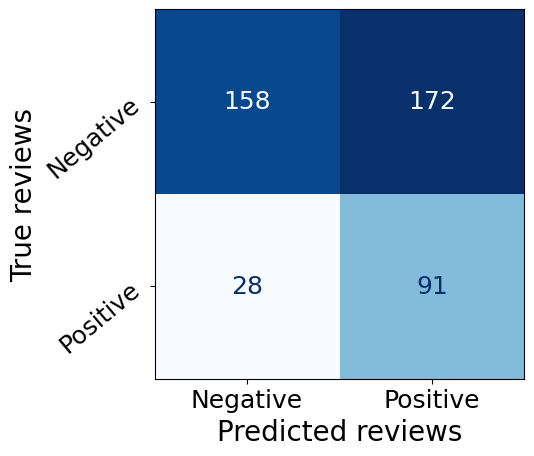

<Figure size 640x480 with 0 Axes>

In [19]:
cm_svm = ConfusionMatrixDisplay.from_estimator(classifier_naive, X_test, test_y, display_labels=['Negative', 'Positive'], cmap='Blues', colorbar=False)
plt.yticks(rotation=40)
plt.ylabel('True reviews', fontsize=20)
plt.xlabel('Predicted reviews', fontsize=20)
plt.show()
plt.savefig('Graphs/CM_naive_WineWhiskey.pdf', format="pdf", bbox_inches="tight")

In [20]:
prediction_svm = svm.predict(X_test)
print(classification_report(test_y, prediction_svm))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55       330
           1       0.35      0.90      0.50       119

    accuracy                           0.53       449
   macro avg       0.63      0.65      0.53       449
weighted avg       0.77      0.53      0.54       449



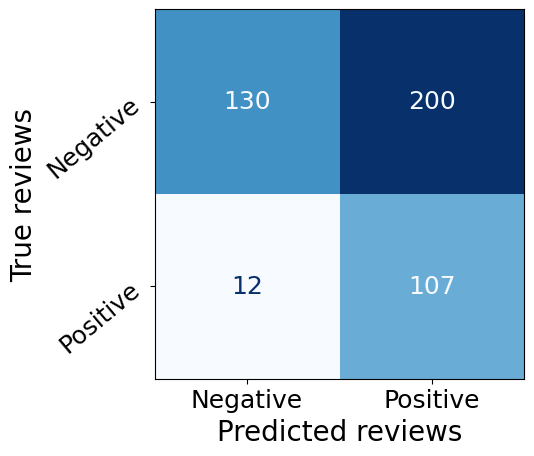

<Figure size 640x480 with 0 Axes>

In [21]:
cm_svm = ConfusionMatrixDisplay.from_estimator(svm, X_test, test_y, display_labels=['Negative', 'Positive'], cmap='Blues', colorbar=False)
plt.yticks(rotation=40)
plt.ylabel('True reviews', fontsize=20)
plt.xlabel('Predicted reviews', fontsize=20)
plt.show()
plt.savefig('Graphs/CM_svm_WineWhiskey.pdf', format="pdf", bbox_inches="tight")

### On all data (like 100%)

In [22]:
train_x, test_x, train_y, test_y = train_test_split(df_whiskey.description, df_whiskey.points, test_size=0.99, random_state=50)

In [23]:
X_train = cv.transform(train_x)
X_test = cv.transform(test_x)

In [24]:
prediction_naive = classifier_naive.predict(X_test)
print(classification_report(test_y, prediction_naive))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63      1661
           1       0.35      0.82      0.49       562

    accuracy                           0.57      2223
   macro avg       0.62      0.66      0.56      2223
weighted avg       0.75      0.57      0.60      2223



In [25]:
prediction_svm = svm.predict(X_test)
print(classification_report(test_y, prediction_svm))

              precision    recall  f1-score   support

           0       0.89      0.38      0.53      1661
           1       0.32      0.86      0.46       562

    accuracy                           0.50      2223
   macro avg       0.60      0.62      0.50      2223
weighted avg       0.74      0.50      0.51      2223

